# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import keras as k
# import gender_guesser.detector as gender

Using TensorFlow backend.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_users = pd.read_csv("/content/dataset/users.csv")
df_fusers = pd.read_csv("/content/dataset/fusers.csv")

In [ ]:
print(df_fusers.shape)
print(df_users.shape)

(3351, 38)
(3474, 42)


# Data Pre-Processing

In [ ]:
df_fusers.isnull().sum()

id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   3250
lang                                     0
time_zone                             3016
location                               575
default_profile                        317
default_profile_image                 3345
geo_enabled                           3212
profile_image_url                        0
profile_banner_url                    3284
profile_use_background_image             9
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

In [ ]:
#for df_fusers
isFake = np.ones(3351)

#for df_users
isNotFake = np.zeros(3474)

In [ ]:
#adding is fake or not column to make predictions for it
df_fusers["isFake"] = isFake
df_users["isFake"] = isNotFake


In [ ]:
df_allUsers = pd.concat([df_fusers, df_users], ignore_index=True)
df_allUsers.columns = df_allUsers.columns.str.strip()

In [ ]:
#to shuffle the whole data
df_allUsers = df_allUsers.sample(frac=1).reset_index(drop=True)

In [ ]:
df_allUsers.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,isFake,test_set_1,test_set_2
count,6.825000e+03,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,4066.0,19.0,2294.0,6426.0,1477.0,2810.000000,1.0,0.0,78.0,11.0,0.0,0.0,0.0,6825.000000,3474.000000,3474.000000
mean,8.499737e+08,8667.221685,717.874432,504.022564,2378.999121,9.959853,1.0,1.0,1.0,1.0,1.0,-4889.145907,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.490989,0.287853,0.141048
std,7.662248e+08,23473.945131,12301.657025,1159.286294,8548.235726,112.952257,0.0,0.0,0.0,0.0,0.0,22037.451204,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.499955,0.452827,0.348121
min,6.780330e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,2.597067e+08,23.000000,12.000000,206.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-25200.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,6.168972e+08,190.000000,33.000000,312.000000,10.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-14400.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,1.174963e+09,6900.000000,349.000000,555.000000,1360.000000,2.000000,1.0,1.0,1.0,1.0,1.0,13500.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,0.000000
max,3.164942e+09,399555.000000,986837.000000,46310.000000,313954.000000,6166.000000,1.0,1.0,1.0,1.0,1.0,46800.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [ ]:
df_allUsers.head

<bound method NDFrame.head of               id               name  ... test_set_1  test_set_2
0      616227442       Albert Roach  ...        NaN         NaN
1      616634356  Bernardina Booker  ...        NaN         NaN
2      836742500            Camiiii  ...        1.0         0.0
3      448116475     Влад из Самары  ...        NaN         NaN
4      169325249       Jeff Topping  ...        1.0         1.0
...          ...                ...  ...        ...         ...
6820   275595583   Thiago Marcelino  ...        NaN         NaN
6821   731955936     brooke eubanks  ...        1.0         1.0
6822  1079378204         Didneylend  ...        0.0         0.0
6823  2324994222          ╰•TuneD•╯  ...        0.0         0.0
6824  1174750884   Sharilyn Clifton  ...        NaN         NaN

[6825 rows x 43 columns]>

In [ ]:
Y = df_allUsers.isFake

In [ ]:
Y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: isFake, dtype: float64

In [ ]:
df_allUsers.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'is_translator',
       'follow_request_sent', 'protected', 'verified', 'notifications',
       'description', 'contributors_enabled', 'following', 'updated', 'isFake',
       'timestamp', 'crawled_at', 'test_set_1', 'test_set_2'],
      dtype='object')

In [ ]:
df1=df_allUsers[['id','favourites_count','followers_count','statuses_count','friends_count','default_profile','default_profile_image','profile_use_background_image','utc_offset','listed_count','geo_enabled','lang','isFake']]

In [ ]:
df1.head()

,id,favourites_count,followers_count,statuses_count,friends_count,default_profile,default_profile_image,profile_use_background_image,utc_offset,listed_count,geo_enabled,lang,isFake
0,616227442,0,21,52,527,1.0,NaN,1.0,NaN,0,NaN,en,1.0
1,616634356,0,13,37,404,1.0,NaN,1.0,NaN,0,NaN,en,1.0
2,836742500,13256,1293,52736,1226,NaN,NaN,1.0,NaN,6,1.0,en,0.0
3,448116475,11,2,34,584,1.0,NaN,1.0,NaN,0,NaN,ru,1.0
4,169325249,107,407,4996,416,NaN,NaN,1.0,-25200.0,7,1.0,en,0.0


In [ ]:
lang_list = list(enumerate(np.unique(df1["lang"])))
lang_dict = {name : i for i, name in lang_list}
print(lang_dict)

{'Select Language...': 0, 'ar': 1, 'da': 2, 'de': 3, 'el': 4, 'en': 5, 'en-AU': 6, 'en-GB': 7, 'en-gb': 8, 'es': 9, 'fil': 10, 'fr': 11, 'id': 12, 'it': 13, 'ja': 14, 'ko': 15, 'nl': 16, 'pl': 17, 'pt': 18, 'ru': 19, 'sv': 20, 'tr': 21, 'xx-lc': 22, 'zh-TW': 23, 'zh-cn': 24, 'zh-tw': 25}


In [ ]:
z=df1.loc[:, "lang_num"] = df1["lang"].map(lambda x: lang_dict[x]).astype(int)


In [ ]:
lang_list = list(enumerate(np.unique(df1["lang"])))
lang_dict = {name : i for i, name in lang_list}
df1.loc[:, "lang_num"] = df1["lang"].map(lambda x: lang_dict[x]).astype(int)

In [ ]:
df1.drop(["lang"], axis=1, inplace=True)

In [ ]:
df1.drop(["isFake"], axis=1, inplace=True)

In [ ]:
df1.head()

,id,favourites_count,followers_count,statuses_count,friends_count,default_profile,default_profile_image,profile_use_background_image,utc_offset,listed_count,geo_enabled,lang_num
0,616227442,0,21,52,527,1.0,NaN,1.0,NaN,0,NaN,5
1,616634356,0,13,37,404,1.0,NaN,1.0,NaN,0,NaN,5
2,836742500,13256,1293,52736,1226,NaN,NaN,1.0,NaN,6,1.0,5
3,448116475,11,2,34,584,1.0,NaN,1.0,NaN,0,NaN,19
4,169325249,107,407,4996,416,NaN,NaN,1.0,-25200.0,7,1.0,5


In [ ]:
df1.isnull().sum()

id                                 0
favourites_count                   0
followers_count                    0
statuses_count                     0
friends_count                      0
default_profile                 2759
default_profile_image           6806
profile_use_background_image     399
utc_offset                      4015
listed_count                       0
geo_enabled                     4531
lang_num                           0
dtype: int64

In [ ]:
df1 = df1.replace(np.nan, 0) #To replace the missing boolean values with zeros as it means false

In [ ]:
df1.isnull().sum()

id                              0
favourites_count                0
followers_count                 0
statuses_count                  0
friends_count                   0
default_profile                 0
default_profile_image           0
profile_use_background_image    0
utc_offset                      0
listed_count                    0
geo_enabled                     0
lang_num                        0
dtype: int64

# Input Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, Y, test_size=0.3) # 70% training and 30% test

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4777, 12)
(2048, 12)
(4777,)
(2048,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

# XGB Classifer

In [ ]:
from xgboost import XGBClassifier
cross_val_score(XGBClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.99316406, 0.99560547, 0.99121094, 0.99609375, 0.9921875 ,
       0.99121094, 0.98828125, 0.99072266, 0.99267578, 0.98876953])

In [ ]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for test data
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
x=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.46%


# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
y=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.17%


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(DecisionTreeClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.99023438, 0.99121094, 0.98681641, 0.98779297, 0.98583984,
       0.99072266, 0.98242188, 0.98388672, 0.98535156, 0.98925781])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
z=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.46%


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.99414062, 0.99462891, 0.99267578, 0.99560547, 0.99169922,
       0.99169922, 0.98925781, 0.99072266, 0.99072266, 0.99072266])

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
classifier=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
c=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.37%


In [ ]:
import sklearn
from sklearn import ensemble
from sklearn import tree
from sklearn import svm

import seaborn as sns

model = [
    ensemble.AdaBoostClassifier(),
    ensemble.RandomForestClassifier(),     
    tree.DecisionTreeClassifier(),
    ensemble.ExtraTreesClassifier(),
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    ]

In [ ]:
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics
model_columns = []
model_compare = pd.DataFrame(columns = model_columns)

row_index = 0
for alg in model: 
    predicted = alg.fit(X_train, y_train).predict(X_test)
    model_compare.loc[row_index, 'model Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    model_compare.loc[row_index, 'model Precission'] = precision_score(y_test, predicted)
    model_compare.loc[row_index, 'model Recall'] = recall_score(y_test, predicted)
    
model_compare.sort_values(by = ['model Test Accuracy'], ascending = False, inplace = True)    
model_compare

,model Test Accuracy,model Precission,model Recall
0,0.9727,0.956055,0.988889


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=[10,8])

# plt.bar(model, width = 0.5, color='#0504aa',alpha=0.7)
# plt.ylim([0.85,1])
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.ylabel('Frequency',fontsize=15)
# plt.title('Normal Distribution Histogram')
# plt.show()

TypeError: ignored

<Figure size 720x576 with 0 Axes>

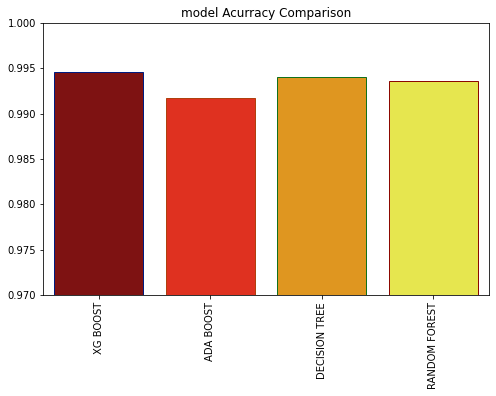

In [ ]:
plt.subplots(figsize=(8,5))
data=[]
data.append(x)
data.append(y)
data.append(0.994)
data.append(c)
label=['XG BOOST','ADA BOOST','DECISION TREE','RANDOM FOREST']
sns.barplot(label,data,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.ylim([0.97,1])
plt.title('model Acurracy Comparison')
plt.show()

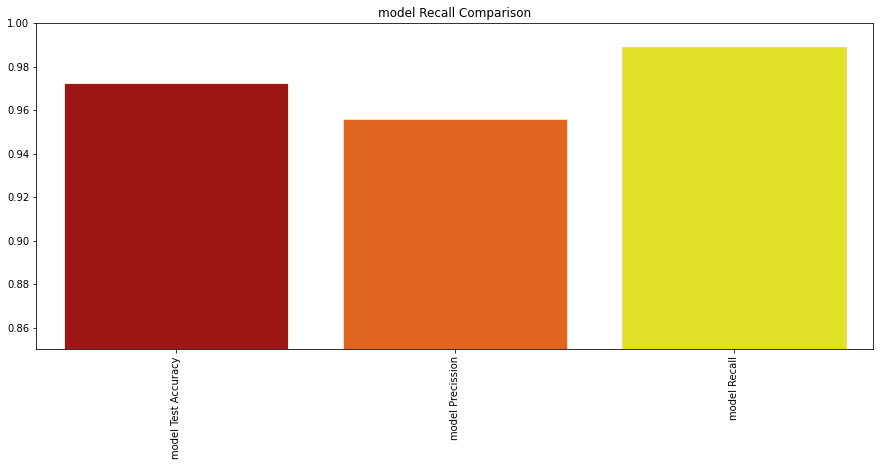

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(data=model_compare,palette='hot',edgecolor=sns.color_palette('OrRd',9))
plt.xticks(rotation=90)
plt.ylim([0.85,1])
plt.title('model Recall Comparison')
plt.show()
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_...

In [ ]:
# index = 1
# for alg in model:
#     predicted = alg.fit(X_train, y_train).predict(X_test)
#     roc_auc_model = metrics.auc(fp, tp)
#     model_name = alg.__class__.__name__
#     plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (model_name, roc_auc_model))

# plt.title('ROC Curve comparison')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')    
# plt.show()

NameError: ignored